## Свёртки

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

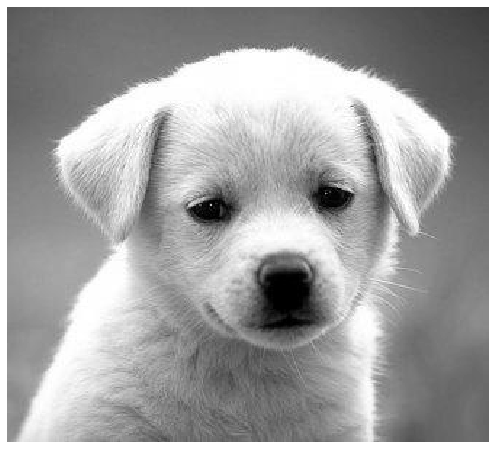

In [71]:
# Open image as grayscale
img = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/dog.jpg', as_gray=True)

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

In [72]:
def conv_nested(img, kernel):
    
    h, w = img.shape
    out = np.zeros_like(img)
    kernel = np.flip(kernel)
    M = np.shape(kernel)[0]

    for i in range(h):
        for j in range(w):
            out[i,j] = 0
            for k in range(M):
                for l in range(M):
                    if(i+k-M//2 < 0 or i+k-M//2 >= h or\
                       j+l-M//2 < 0 or j+l-M//2 >= w):
                        continue
                    out[i,j] += img[i+k-M//2,j+l-M//2]*kernel[k,l]
    return out

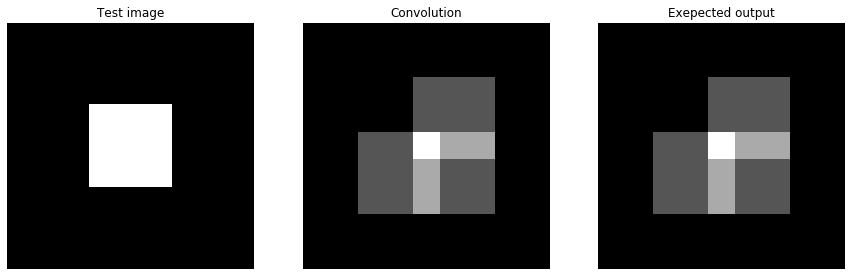

In [73]:
# Simple convolution kernel.
kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,0]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1

# Run your conv_nested function on the test image
test_output = conv_nested(test_img, kernel)

# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[2:7, 2:7] = 1
expected_output[5:, 5:] = 0
expected_output[4, 2:5] = 2
expected_output[2:5, 4] = 2
expected_output[4, 4] = 3

plt.subplots(figsize=(15,10))

# Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,3,2)
plt.imshow(np.flip(test_output))
plt.title('Convolution')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,3)
plt.imshow(np.flip(expected_output))
plt.title('Exepected output')
plt.axis('off')
plt.show()

# Test if the output matches expected output
assert np.max(test_output - expected_output) < 1e-10, "Your solution is not correct."

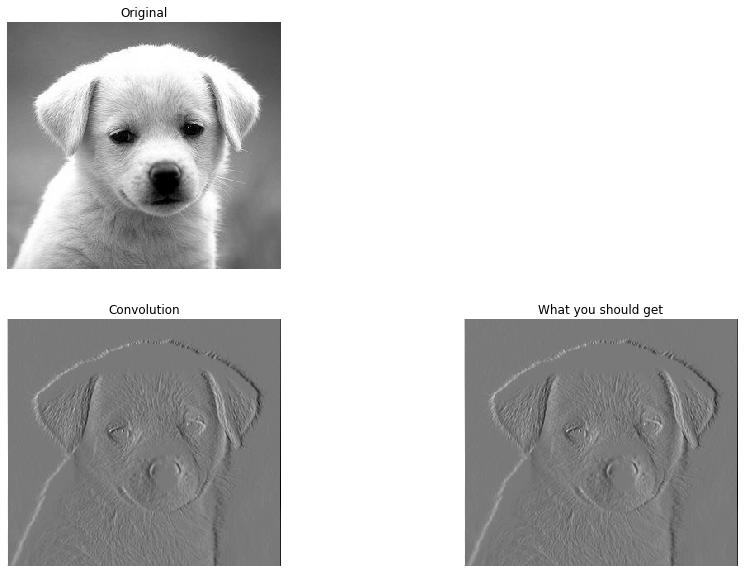

In [74]:
# Simple convolution kernel.
# Feel free to change the kernel to see different outputs.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

out = conv_nested(img, kernel)
plt.subplots(figsize=(15,10))

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out)
plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/convoluted_dog.jpg', as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

In [75]:
def zero_pad(img, pad_height, pad_width):
    h, w = img.shape
    out = np.zeros((h+pad_height*2, w+pad_width*2))
    out[pad_height:h+pad_height,pad_width:w+pad_width] = img[:,:]
    return out

(380, 372)


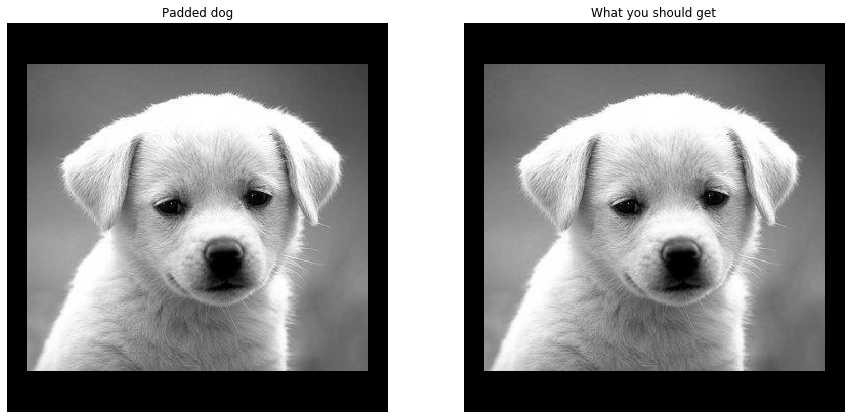

In [76]:
pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_width)
plt.subplots(figsize=(15,10))

# Plot your padded dog
plt.subplot(1,2,1)
print(padded_img.shape)
plt.imshow(padded_img)
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/padded_dog.jpg', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

In [77]:
def conv_fast(img, kernel):
    h, w = img.shape
    H = np.shape(kernel)[0]
    W = np.shape(kernel)[1]

    H = H - 1 + (H % 2)
    W = W - 1 + (W % 2)
    
    out = np.zeros_like(img)
    
    img = zero_pad(img, H//2, W//2)
    kernel = np.flip(kernel)
    kernel = kernel[:H, :W]
    
    for i in range(h):
        for j in range(w):
            out[i,j] = np.sum(img[i:i+H,j:j+W]*kernel)
    return out

conv_nested: took 1.012508 seconds.
conv_fast: took 0.590657 seconds.


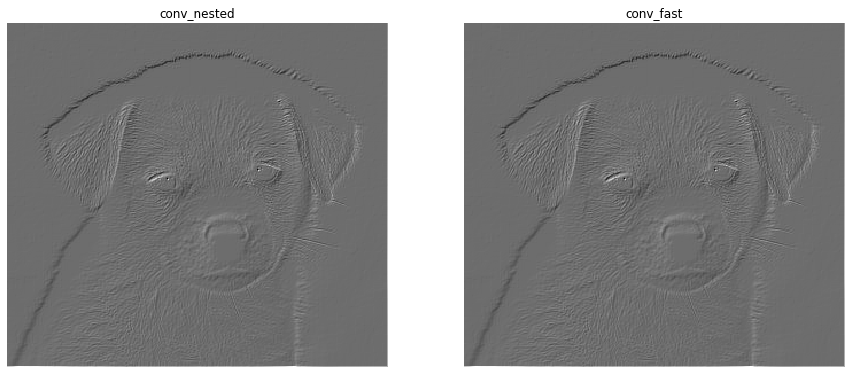

In [78]:
kernel = np.array(
[
    [-1,0,0],
    [0,1,0],
    [0,0,0]
])

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_nested = conv_nested(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_nested: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

plt.subplots(figsize=(15,10))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_nested)
plt.title('conv_nested')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_nested) < 1e-10):
    print("Different outputs! Check your implementation.")

## Кросс - корреляция

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [80]:
def cross_correlation(img1, img2):
    return conv_fast(img1, img2)

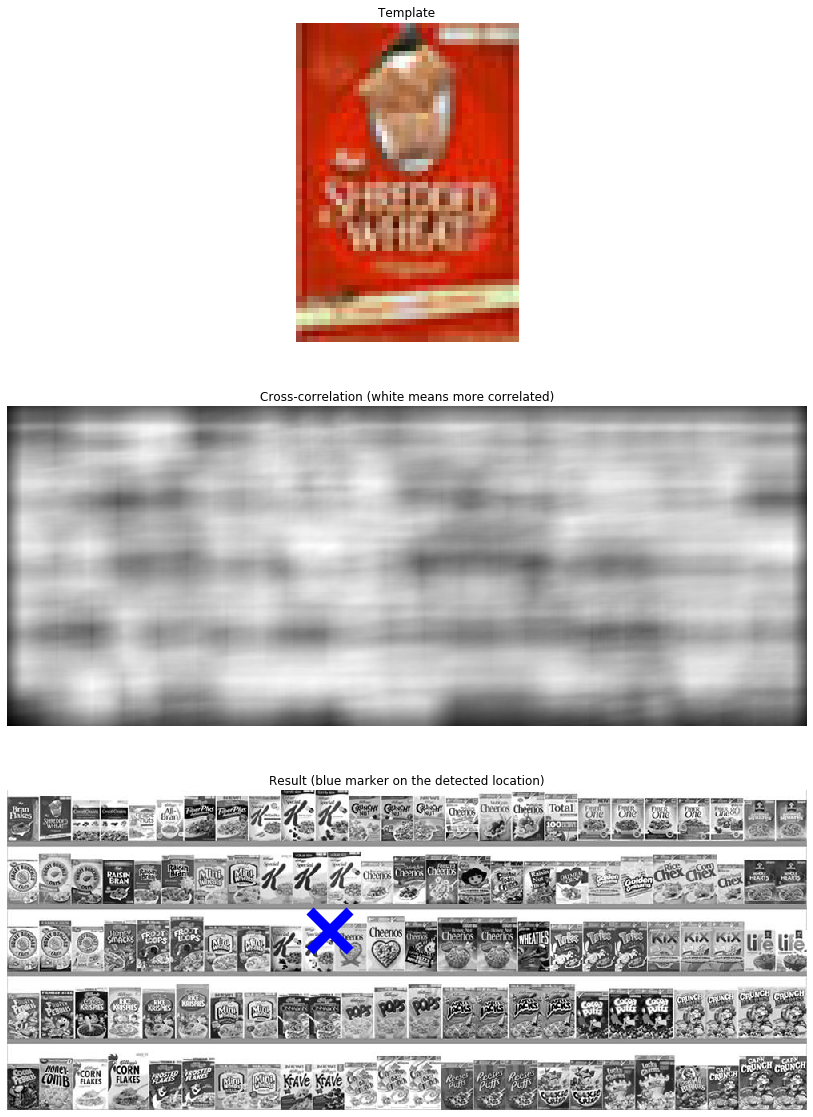

In [81]:
# Load template and image in grayscale
img = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/shelf.jpg')
img_grey = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/shelf.jpg', as_gray=True)
temp = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/template.jpg')
temp_grey = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/template.jpg', as_gray=True)

# Perform cross-correlation between the image and the template
out = cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display product template
plt.figure(figsize=(25,20))
plt.subplot(3, 1, 1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

# Display cross-correlation output
plt.subplot(3, 1, 2)
plt.imshow(out)
plt.title('Cross-correlation (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img_grey)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()

##### Такой вид кросс-корреляции дает максимум на абсолютно белой картинке и шаблоне, т.к. значения пикселей от 0 до 1 и при попадании пикселя самого на себя возводится в квадрат
##### В результате слагаемое в сумме становится меньше, чем если бы пиксель наложился на белую картинку(умножился на 1)
##### Таким образом данная функция ищет наболее светлую область изображения, вне зависимости от шаблона(если он ненулевой, конечно же)

In [82]:
def zero_mean_cross_correlation(img1, img2):
    mean = np.mean(img2)
    return conv_fast(img1, img2 - mean)

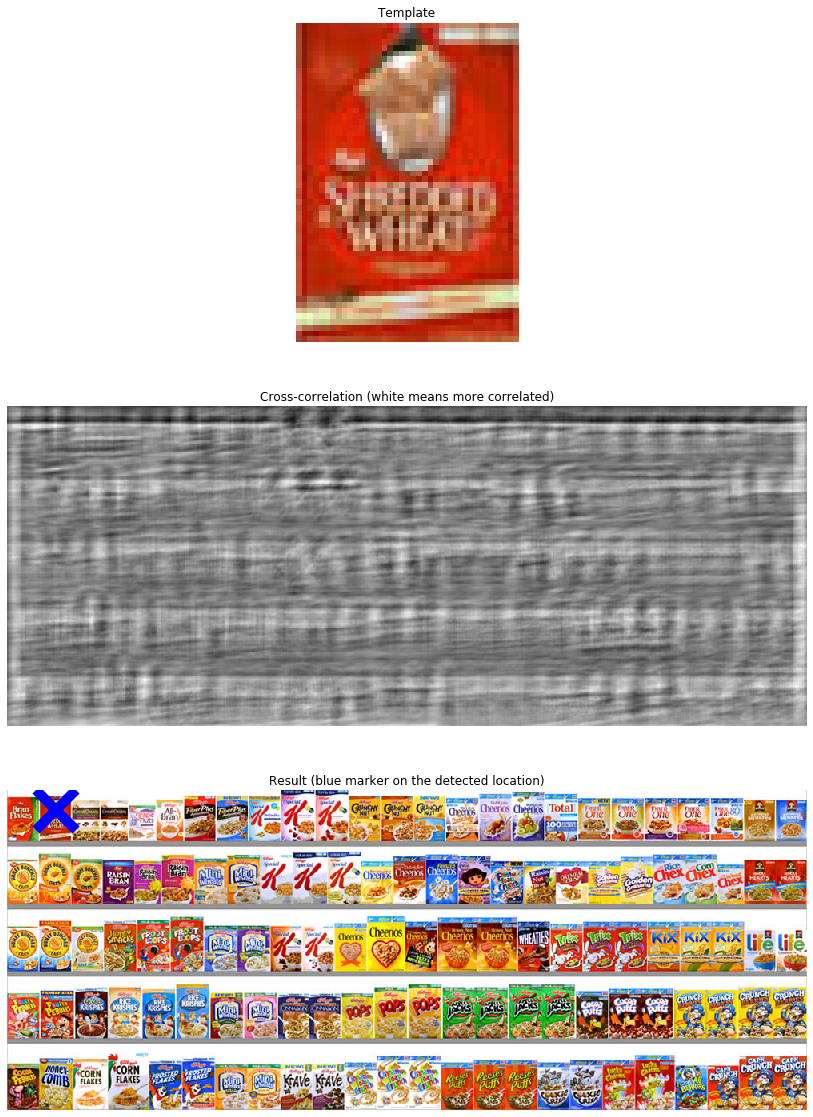

In [83]:
# Perform cross-correlation between the image and the template
out = zero_mean_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display product template
plt.figure(figsize=(30,20))
plt.subplot(3, 1, 1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

# Display cross-correlation output
plt.subplot(3, 1, 2)
plt.imshow(out)
plt.title('Cross-correlation (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()

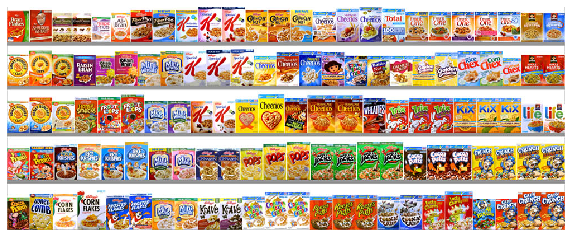

The product is on the shelf


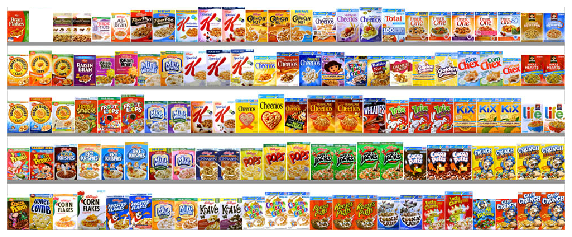

The product is not on the shelf


In [84]:
def check_product_on_shelf(shelf, product):
    out = zero_mean_cross_correlation(shelf, product)
    
    # Scale output by the size of the template
    out = out / float(product.shape[0]*product.shape[1])
    
    # Threshold output (this is arbitrary, you would need to tune the threshold for a real application)
    out = out > 0.0185
    
    if np.sum(out) > 0:
        print('The product is on the shelf')
    else:
        print('The product is not on the shelf')

# Load image of the shelf without the product
img2 = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/shelf_soldout.jpg')
img2_grey = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/shelf_soldout.jpg', as_gray=True)

plt.imshow(img)
plt.axis('off')
plt.show()
check_product_on_shelf(img_grey, temp_grey)

plt.imshow(img2)
plt.axis('off')
plt.show()
check_product_on_shelf(img2_grey, temp_grey)

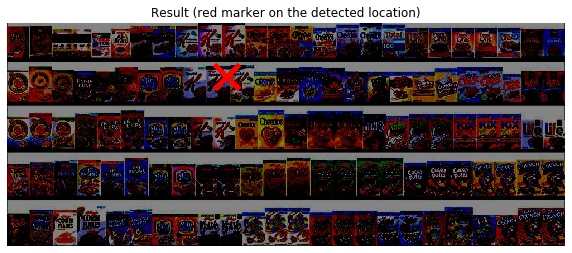

In [85]:
img = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/shelf_dark.jpg')
img_grey = io.imread('/home/liza/Загрузки/cv_mipt_minor-master/02. Signal processing/homework/img/shelf_dark.jpg', as_gray=True)

# Perform cross-correlation between the image and the template
out = zero_mean_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display image
plt.imshow(img)
plt.title('Result (red marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'rx', ms=25, mew=5)
plt.show()

In [86]:
def normalized_cross_correlation(img1, img2):
    h, w = img1.shape
    H = np.shape(img2)[0]
    W = np.shape(img2)[1]

    H = H - 1 + (H % 2)
    W = W - 1 + (W % 2)
    
    out = np.zeros_like(img1)
    
    img1 = zero_pad(img1, H//2, W//2)
    img2 = img2[:H, :W]
    
    mean2 = np.mean(img2)
    sigma2 = np.std(img2)
    
    for i in range(h):
        for j in range(w):
            patch = img1[i:i+H,j:j+W]
            out[i,j] = np.sum((patch-np.mean(patch))/np.std(patch)*\
                              (img2 - mean2)/sigma2)
    return out

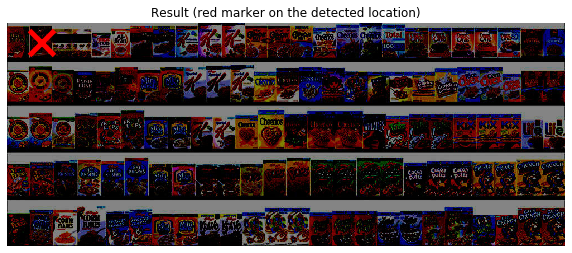

In [87]:
# Perform normalized cross-correlation between the image and the template
out2 = normalized_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out2.argmax(), out2.shape))

# Display image
plt.imshow(img)
plt.title('Result (red marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'rx', ms=25, mew=5)
plt.show()